<font size="4">

## Dataset: Saratoga Houses

El dataset **SaratogaHouses** contiene información sobre viviendas en el condado de Saratoga, Nueva York. Cada fila representa una casa y las columnas describen diversas características relacionadas con la propiedad, como el tamaño de la vivienda (`livingArea`), el número de dormitorios y baños, la presencia de garaje o chimenea, el año de construcción, el tamaño del terreno (`landValue`), entre otros. La variable objetivo suele ser el **precio de venta** de la casa (`price`), lo que lo convierte en un dataset ideal para problemas de regresión en ciencia de datos e inteligencia artificial. Aunque algunas variables son numéricas, otras se comportan como categóricas, lo que permite explorar técnicas de tratamiento mixto y evaluación de modelos predictivos.

El dataset consta de 15 variables, a las cuales les acompaña la columna precio, que es la variable objetivo. A continuación, veremos que significa cada una de las variables de la matriz de características del dataset:

- price: precio de la vivienda.
- lotSize: metros cuadrados de la vivienda.
- age: antigüedad de la vivienda.
- landValue: valor del terreno.
- livingArea: metros cuadrados habitables.
- pctCollege: porcentaje del vecindario con título universitario.
- bedrooms: número de dormitorios.
- firplaces: número de chimeneas.
- bathrooms: número de cuartos de baño (el valor 0.5 hace referencia a cuartos de baño sin ducha).
- rooms: número de habitaciones.
- heating: tipo de calefacción.
- fuel: tipo de alimentación de la calefacción (gas, electricidad o diesel).
- sewer: tipo de desagüe.
- waterfront: si la vivienda tiene vistas al lago.
- newConstruction: si la vivienda es de nueva construcción.
- centralAir: si la vivienda tiene aire acondicionado.

link de descarga: https://www.kaggle.com/datasets/carloscinelli/saratoga

In [633]:
# importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

warnings.filterwarnings('ignore')

In [634]:
# lectura del dataset
dataset = pd.read_csv("SaratogaHouses.csv", delimiter=",")

dataset.head(10)

price  lotSize  age  landValue  livingArea  pctCollege  bedrooms  \
0  132500     0.09   42      50000         906          35         2   
1  181115     0.92    0      22300        1953          51         3   
2  109000     0.19  133       7300        1944          51         4   
3  155000     0.41   13      18700        1944          51         3   
4   86060     0.11    0      15000         840          51         2   
5  120000     0.68   31      14000        1152          22         4   
6  153000     0.40   33      23300        2752          51         4   
7  170000     1.21   23      14600        1662          35         4   
8   90000     0.83   36      22200        1632          51         3   
9  122900     1.94    4      21200        1416          44         3   

   fireplaces  bathrooms  rooms          heating      fuel              sewer  \
0           1        1.0      5         electric  electric             septic   
1           0        2.5      6  hot water/steam       gas             septic   
2           1        1.0      8  hot water/steam       gas  public/commercial   
3           1        1.5      5          hot air       gas             septic   
4           0        1.0      3          hot air       gas  public/commercial   
5           1        1.0      8          hot air       gas             septic   
6           1        1.5      8  hot water/steam       oil             septic   
7           1        1.5      9          hot air       oil             septic   
8           0        1.5      8         electric  electric             septic   
9           0        1.5      6          hot air       gas               none   

  waterfront newConstruction centralAir  
0         No              No         No  
1         No              No         No  
2         No              No         No  
3         No              No         No  
4         No             Yes        Yes  
5         No              No         No  
6         No              No         No  
7         No              No         No  
8         No              No         No  
9         No              No         No

<font size="4">

# Análisis Exploratorio de los Datos (EDA)

Como podemos ver en el código debajo de este bloque de texto, el dataset tiene una dimensión de 1728 registros por 16 columnas de características. De estas 16 columnas, 15 pertenecen a la matriz de características y la columna de precio es la columna a predecir, la que vamos a tener como objetivo a predecir.

En cuanto a los tipos de variables, podemos apreciar que tenemos tanto variables numéricas como variables de tipo caracter (object). De las variables numéricas tenemos: precio, lotSize, age, landValue, livinigArea, pctCollege, bedrooms, fireplaces, bathrooms y rooms. Por otro lado, en cuanto a las variables categóricas tenemos: heating, fuel, sewer, waterfront, newConstruction y centralAir.

Después, procedemos a ver la cantidad de valores nulos que tiene el dataset ya que, en caso de que hubiesen, debiamos de tratarlos ya sea, eliminandolos o escribiéndolos con valores promedios de su columna. En este caso, no hay valores nulos en este dataset, por lo que procedemos a saltarnos este paso.


In [635]:
# dimensiones del dataset
dataset.shape

(1728, 16)

In [636]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


In [637]:
# Buscamos los valores nulos
dataset.isnull().sum()

price              0
lotSize            0
age                0
landValue          0
livingArea         0
pctCollege         0
bedrooms           0
fireplaces         0
bathrooms          0
rooms              0
heating            0
fuel               0
sewer              0
waterfront         0
newConstruction    0
centralAir         0
dtype: int64

<font size="4">

Ahora, vamos a proceder a analizar la variable precio, es decir, la variable objetivo a predecir en este problema. Para ello, vamos a realizar una gráfica para observar la distribución que siguen los datos. 

Como podemos observar, la columna objetivo, la columna "price", sigue una distribución normal. Esto es importante tenerlo en cuenta ya que hay modelos que no funcionan bien con una determinada distribución de los datos.

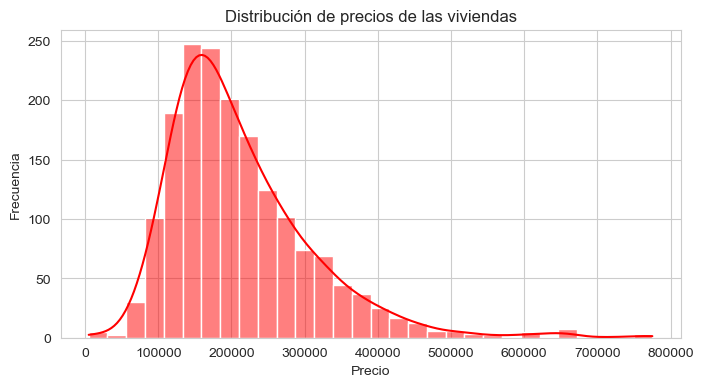

In [638]:
plt.figure(figsize=(8, 4))
sns.histplot(dataset['price'], kde=True, bins=30, color='red')
plt.title('Distribución de precios de las viviendas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

<font size="4">

#### Análisis de las variables numéricas

En este apartado procederemos a analizar las variables númericas para hacernos la idea de cómo es la distribución que siguen estos datos. Para ello, utilizaremos gráficas de densidad debido a que al ser variables numéricas, la posibilidad de valores es infinita.

Tras poder visualizar las gráficas de distribución de cada una de las variables cuantitativas, se ha decidido que las siguientes columnas van a tratarse como variables cualitativas y, por consiguiente, vamos a realizar agrupaciones de los valores de estas, debido a que los resultado están muy desequilibrados:
- bedrooms
- fireplaces

Es por ello, que vamos a convertirlas a tipo string (código debajo de las gráficas)

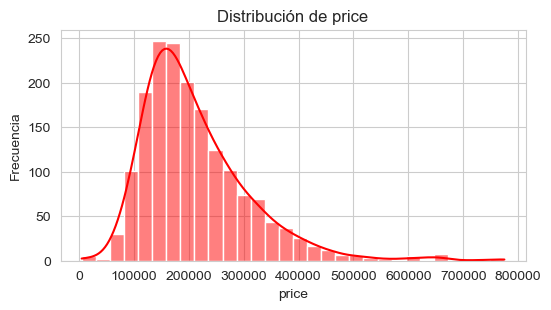

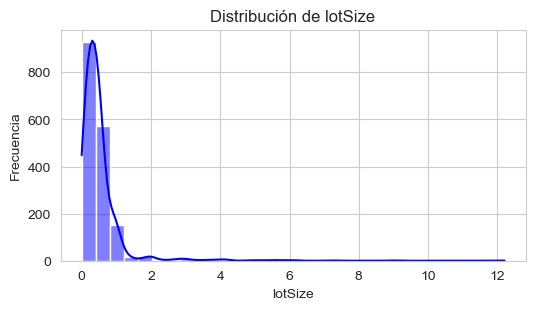

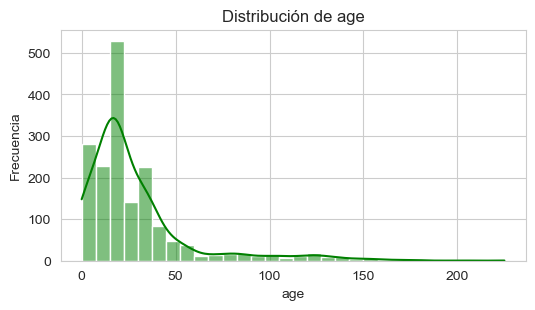

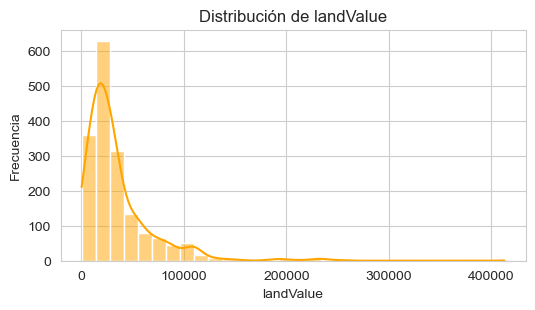

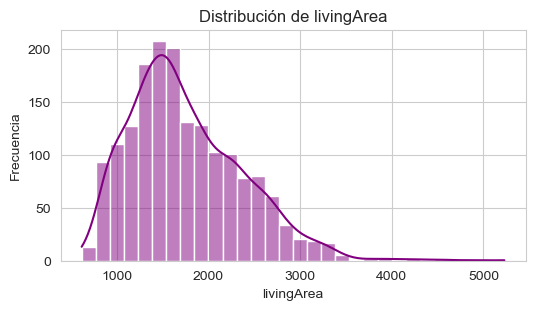

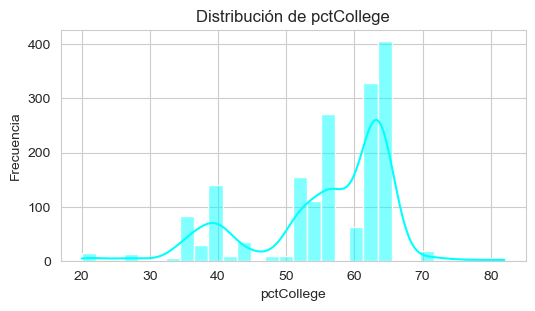

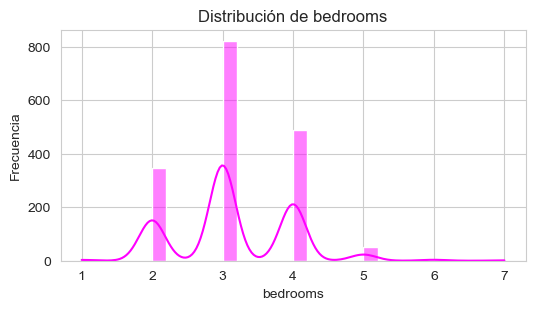

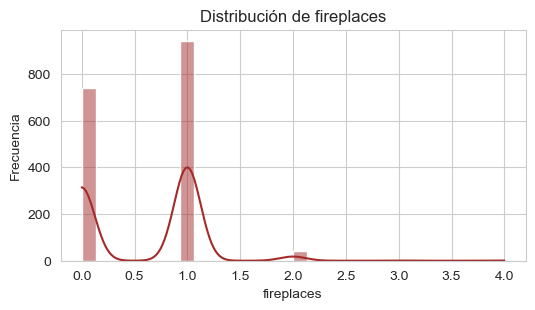

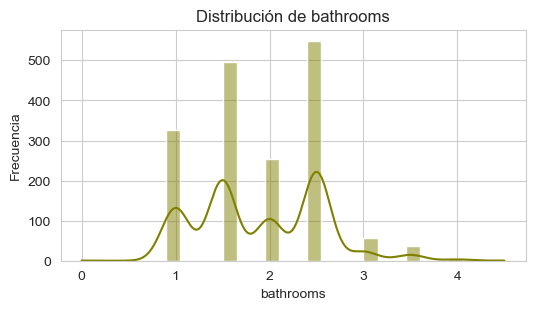

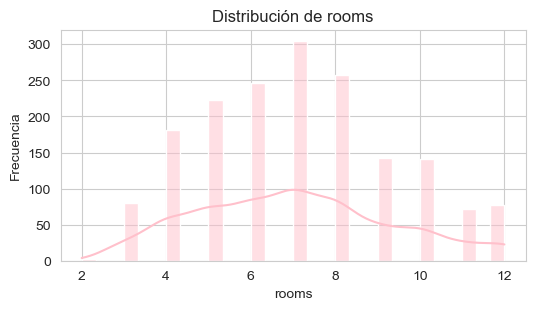

In [639]:
lista_columnas = dataset.select_dtypes(include=['int64', 'float64']).columns
colores = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'olive', 'pink']

for i, columna in enumerate(lista_columnas):
    plt.figure(figsize=(6, 3))
    color = colores[i % len(colores)]  # Para evitar errores si hay más columnas que colore
    sns.histplot(dataset[columna], kde=True, bins=30, color= color)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

In [640]:
dataset["bathrooms"]

0       1.0
1       2.5
2       1.0
3       1.5
4       1.0
       ... 
1723    2.5
1724    2.5
1725    1.0
1726    1.0
1727    1.0
Name: bathrooms, Length: 1728, dtype: float64

In [641]:
# convertimos a string las variables cuantitativas que pasamos a cualitativas
dataset.fireplaces = dataset.fireplaces.astype('str')
dataset.bedrooms = dataset.bedrooms.astype('str')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   object 
 7   fireplaces       1728 non-null   object 
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(6), object(8)
memory usage: 216.1+ KB


In [642]:
dataset.select_dtypes(include=['int64', 'float64']).describe()

price      lotSize          age      landValue   livingArea  \
count    1728.000000  1728.000000  1728.000000    1728.000000  1728.000000   
mean   211966.705440     0.500214    27.916088   34557.187500  1754.975694   
std     98441.391015     0.698680    29.209988   35021.168056   619.935553   
min      5000.000000     0.000000     0.000000     200.000000   616.000000   
25%    145000.000000     0.170000    13.000000   15100.000000  1300.000000   
50%    189900.000000     0.370000    19.000000   25000.000000  1634.500000   
75%    259000.000000     0.540000    34.000000   40200.000000  2137.750000   
max    775000.000000    12.200000   225.000000  412600.000000  5228.000000   

        pctCollege    bathrooms        rooms  
count  1728.000000  1728.000000  1728.000000  
mean     55.567708     1.900174     7.041667  
std      10.333581     0.658352     2.316453  
min      20.000000     0.000000     2.000000  
25%      52.000000     1.500000     5.000000  
50%      57.000000     2.000000     7.000000  
75%      64.000000     2.500000     8.250000  
max      82.000000     4.500000    12.000000

<font size="4">

Procedemos analizar la correlación de todas las variables entre si, para ello, seguiremos el esquema de esta tabla:

| Tipo de correlación                                    | Impacto en regresión lineal                           | Solución recomendada                      |
| ----------------------------------------------------- | ---------------------------------------------------- | --------------------------------------- |
| Alta correlación entre predictores (multicolinealidad) | Coeficientes inestables, dificultad de interpretación | Eliminar variables, regularización, PCA |
| Baja o nula correlación con variable objetivo          | Variable poco útil, agrega ruido                      | Eliminar variable o revisar su relevancia |
| Correlación moderada a alta con variable objetivo      | Útil para predecir                                    | Mantener en el modelo                    |

En el código de a continuación, se genera la matriz de correlación utilizando un mapa de calor. En él, podemos ver como de relacionadas están las variables entre sí. Valores cercanos a 1 y a -1 significa que esas dos variables están muy relacionadas entre sí, en cambio, valores cercanos a 0, significa que las variables no están relacionadas entre sí, lo cual puede ser positivo o no, dependiendo de si las dos variables son predictoras o, una predictora y la otra objetivo.



               price   lotSize       age  landValue  livingArea  pctCollege  \
price       1.000000  0.158333 -0.188793   0.581266    0.712390    0.200119   
lotSize     0.158333  1.000000 -0.016352   0.059222    0.163450   -0.033148   
age        -0.188793 -0.016352  1.000000  -0.021818   -0.174242   -0.037785   
landValue   0.581266  0.059222 -0.021818   1.000000    0.423441    0.228427   
livingArea  0.712390  0.163450 -0.174242   0.423441    1.000000    0.209981   
pctCollege  0.200119 -0.033148 -0.037785   0.228427    0.209981    1.000000   
bathrooms   0.597250  0.084823 -0.361897   0.297498    0.718564    0.179541   
rooms       0.531170  0.137604 -0.082264   0.298865    0.733666    0.157068   

            bathrooms     rooms  
price        0.597250  0.531170  
lotSize      0.084823  0.137604  
age         -0.361897 -0.082264  
landValue    0.297498  0.298865  
livingArea   0.718564  0.733666  
pctCollege   0.179541  0.157068  
bathrooms    1.000000  0.517585  
rooms        0.5

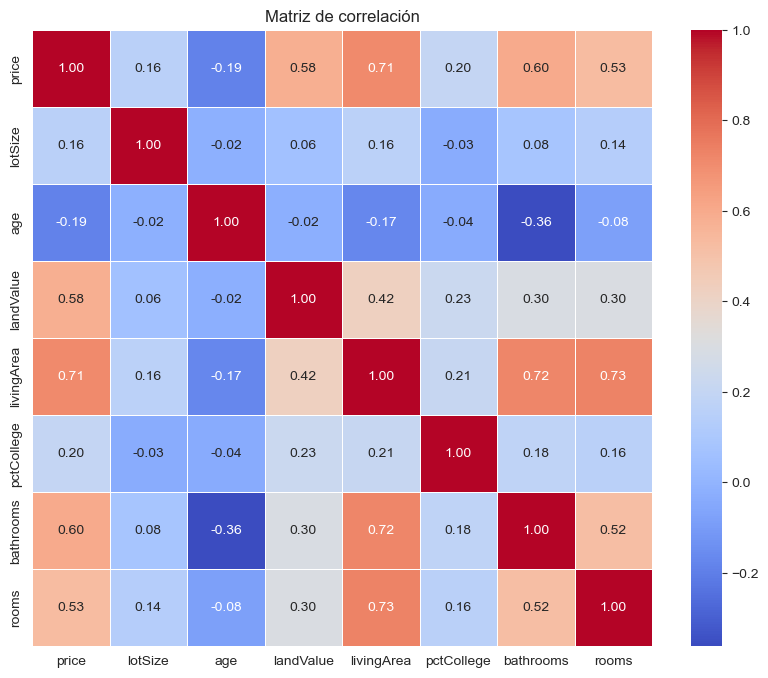

In [643]:
import matplotlib.pyplot as plt
# calculamos la matriz de correlación

dataset_num = dataset.select_dtypes(include=['int64', 'float64'])
corr_matrix = dataset_num.corr()

print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

<font size="4">

Tras analizar la correlación entre las variables. Procedemos a mantener todas las variables aunque, podríamos eliminar:
- livingArea: por su alta correlación con las variables rooms y bathrooms.
- lotSize, age y bathrooms: por su baja correlación con respecto a la variable objetivo.
<br>
<br>
<br>
#### Análisis de las variables cualitativas

Para el análisis de las variables cualitativas, vamos a proceder, primeramente a graficar cada una de ella con la finalidad de observar como se distribuyen los datos (cuanta cantidad de cada opción hay en cada variable).

Analizando las gráficas de densidad de las variables cualitativas nos damos cuenta que hay valores en ciertas variables los cuales están muy por debajo del resto de esa misma variable, es por ello que vamos a agruparlos. Las agrupaciones que vamos a realizar son las siguientes:
- bedrooms: los valores que tendrá son [1, 2, 3, 4, 5 o más]
- fireplaces: los valores que tendrá son [0, 1, 2 o más]

In [644]:
dataset.select_dtypes(include=["object"]).describe()

bedrooms fireplaces  heating  fuel              sewer waterfront  \
count      1728       1728     1728  1728               1728       1728   
unique        7          5        3     3                  3          2   
top           3          1  hot air   gas  public/commercial         No   
freq        822        942     1121  1197               1213       1713   

       newConstruction centralAir  
count             1728       1728  
unique               2          2  
top                 No         No  
freq              1647       1093

bedrooms
1      7
2    348
3    822
4    487
5     53
6      8
7      3
Name: count, dtype: int64
******************************
fireplaces
0    740
1    942
2     42
3      2
4      2
Name: count, dtype: int64
******************************
heating
electric            305
hot air            1121
hot water/steam     302
Name: count, dtype: int64
******************************
fuel
electric     315
gas         1197
oil          216
Name: count, dtype: int64
******************************
sewer
none                   12
public/commercial    1213
septic                503
Name: count, dtype: int64
******************************
waterfront
No     1713
Yes      15
Name: count, dtype: int64
******************************
newConstruction
No     1647
Yes      81
Name: count, dtype: int64
******************************
centralAir
No     1093
Yes     635
Name: count, dtype: int64
******************************


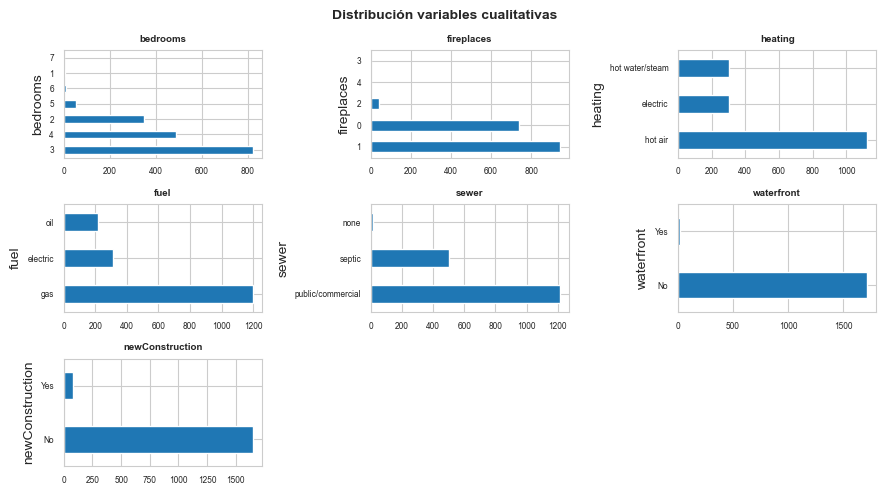

In [645]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = dataset.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    dataset[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold")

# calculamos densidad de valores de cada variable
for columna in dataset.select_dtypes(include=['object']).columns:
    print(f"{dataset[columna].value_counts().sort_index()}")
    print("*"*30)

<font size="4">

Procedemos a agrupar los valores que hemos mencionado anteriormente:


In [646]:
# agrupamos valores columna bedrooms
mapa_bedrooms = {
    "1" : "1",
    "2" : "2",
    "3" : "3",
    "4" : "4",
    "5" : ">5",
    "6" : ">5",
    "7" : ">5",
}

dataset['bedrooms'] = dataset['bedrooms'].map(mapa_bedrooms)
dataset['bedrooms'].unique().tolist()

['2', '3', '4', '>5', '1']

In [647]:
# agrupamos valores columna fireplace
mapa_fireplaces = {
    "0" : "0",
    "1" : "1",
    "2" : ">2",
    "3" : ">2",
    "4" : ">2"
}

dataset["fireplaces"] = dataset["fireplaces"].map(mapa_fireplaces)
dataset["fireplaces"].unique().tolist()

['1', '0', '>2']

<font size="4">

Una vez realizado todo el análisis exploratorio de los datos sobre las variables cuantitativas y cualitativas, vamos a proceder a representar como están distribuidos los datos de cada una de las variables cualitativas con respecto a la variable objetivo (precio).

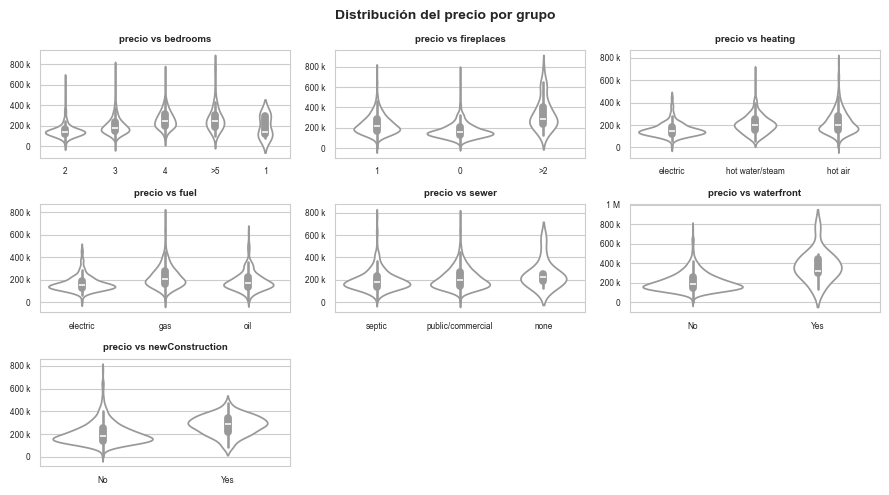

In [648]:
from matplotlib import ticker

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = dataset.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'price',
        data  = dataset,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del precio por grupo', fontsize = 10, fontweight = "bold");

<font size="4">

# Preprocesamiento de los datos

Hasta este punto, hemos extraído gran cantidad de información del dataset y, ahora a continuación, vamos a preparar los datos para que el modelo los coja como está diseñado, es decir, vamos a realizar el preprocesamiento de los datos. 

Primero, dividiremos el dataset en conjunto train y conjunto test. Después procederemos a realizar el preprocesamiento de las variables. Para ello, aplicaremos varios métodos:
- variables cuantitativas: utilizaremos un standar_scaler para que los valores estén normalizados con media=0 y desviación=1
- variables cualitativas: dependiendo del caso, utilizaremos OneHotEncoding o LabelEncoding

Para realizar el preprocesamiento usaremos la funcion ColumnTransformer para hacer las transformaciones en paralelo

In [649]:
# Division del dataset en train y test
x_train, x_test, y_train, y_test = train_test_split(
    dataset.drop("price", axis="columns"),
    dataset["price"],
    test_size=0.3,
    random_state=42
)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1209, 15) (1209,) (519, 15) (519,)


In [650]:
col_cualitativas = x_train.select_dtypes(include=["object"]).columns.tolist()
col_cuantitativas = x_train.select_dtypes(include=["int64", "float64"]).columns.tolist()


# Diseñamos el preprocesador
preprocesador = ColumnTransformer(
                   [('scale', StandardScaler(), col_cuantitativas),
                    ('onehot', OneHotEncoder(drop="first",handle_unknown='ignore', sparse_output=False), col_cualitativas)],
                remainder = 'passthrough',
                verbose_feature_names_out = False
               ).set_output(transform="pandas")

In [651]:
from sklearn import set_config
set_config(display='diagram')
preprocesador

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', StandardScaler(),
                                 ['lotSize', 'age', 'landValue', 'livingArea',
                                  'pctCollege', 'bathrooms', 'rooms']),
                                ('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['bedrooms', 'fireplaces', 'heating', 'fuel',
                                  'sewer', 'waterfront', 'newConstruction',
                                  'centralAir'])],
                  verbose_feature_names_out=False)

<font size="4">

# Creamos modelo, entrenamos y calculamos métricas

En este bloque vamos a definir un modelo de caja negra al cual le aplicaremos métodos agnósticos para entender las decisiones del modelo. Acto seguido utilizaremos los métodos explicativos basados en ejemplos. En cuanto al algoritmo que vamos a emplear, se trata del K-Vecinos Cercanos.

Los **métodos de explicación basados en ejemplos** son técnicas que ayudan a entender las predicciones de un modelo de machine learning mostrando casos concretos del conjunto de datos que son similares a la instancia que se quiere explicar. En lugar de analizar el funcionamiento interno del modelo o la importancia de las variables, estos métodos ofrecen interpretaciones comparando el caso actual con otros ejemplos ya vistos, como los más cercanos, los más representativos (prototipos), los más influyentes o aquellos que hubieran cambiado el resultado (contrafactuales). Son especialmente útiles porque permiten a los usuarios, incluso sin conocimientos técnicos, comprender las decisiones del modelo a través de ejemplos reales y comparables.

El algoritmo **k-Nearest Neighbors (k-NN)** es un método de aprendizaje supervisado que se utiliza tanto para clasificación como para regresión. Funciona buscando los **k ejemplos más cercanos** (según una medida de distancia, como la euclidiana) al nuevo punto que se quiere predecir. En clasificación, la predicción se hace eligiendo la clase más común entre esos vecinos; en regresión, se calcula el promedio de sus valores numéricos. K-NN no entrena un modelo explícito, sino que **almacena todos los datos** y realiza el cálculo en el momento de la predicción, por lo que se considera un método **basado en instancias** y de tipo **perezoso**.

In [652]:
# vemos tamaño del dataset de train y test
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1209, 15), (519, 15), (1209,), (519,))

<font size="4">

La explicación basada en KNN (k-Nearest Neighbors) consiste en justificar la predicción de un modelo mostrando las instancias del conjunto de entrenamiento que son más similares a la observación que se quiere explicar. En lugar de analizar cómo funciona internamente el modelo, este enfoque se basa en comparar la entrada actual con sus **k vecinos más cercanos** según una medida de distancia (como la euclidiana). Para la regresión, la predicción es el promedio de los valores objetivo de esos vecinos, por lo que se puede interpretar diciendo: *“Este valor se predijo porque es similar a estos otros casos, que tenían valores así”*. Esto facilita la comprensión para usuarios no expertos, ya que ofrece ejemplos concretos que ilustran cómo el modelo llega a sus decisiones.

In [653]:
# creamos el modelo
modelo_KNN = KNeighborsRegressor()

# definimos hiperparámetros con el nombre correcto del paso
hiperparametros = {
    'model__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]
}

# definimos el pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocesador),
    ('model', modelo_KNN),
])

# definimos gridsearchCV con el pipeline entero
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=hiperparametros,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# entrenamos el modelo
grid_search.fit(x_train, y_train)

# mejores parametros
print(f"Mejores parametros: {grid_search.best_params_}")
print(f"Mejor score (neg MSE): {grid_search.best_score_}")

# predecimos el modelo
y_pred = grid_search.best_estimator_.predict(x_test)

# guardamos el mejor modelo
mejor_modelo = grid_search.best_estimator_

Mejores parametros: {'model__n_neighbors': 11, 'model__p': 1, 'model__weights': 'distance'}
Mejor score (neg MSE): -3342591564.293102


<font size="4">

Podemos observar que la mejor combinación dada por el gridsearchCV es:
- número de vecinos = 11
- los vecinos más cercanos son los que tendrán un peso mayor
- la métrica que se usa para medir la distntacia será la distancia manhattan

In [654]:
# Evaluar con métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R²     : {r2:.4f}")
print(f"MAE    : {mae:.2f}")
print(f"RMSE   : {rmse:.2f}")

R²     : 0.5985
MAE    : 42752.76
RMSE   : 67373.71


<font size="4">

Procedemos a utilizar el método explicativo de KNN para explicar dos instancias de set de test, para que no hayan sido entrenadas anteriormente por el modelo.

In [655]:
# seleccionamos un par de ejemplos para su explicabilidad
instancia1 = x_test.iloc[[1]]
index_1 = instancia1.index[0]
instancia2 = x_test.iloc[[10]]
index_2 = instancia2.index[0]

instancia1

lotSize  age  landValue  livingArea  pctCollege bedrooms fireplaces  \
1201     0.48   31      72600        3968          62       >5         >2   

      bathrooms  rooms  heating fuel              sewer waterfront  \
1201        3.5     12  hot air  gas  public/commercial         No   

     newConstruction centralAir  
1201              No        Yes

In [656]:
# Calculamos la prediccion que nos daría el modelo
pred_instancia_1 = mejor_modelo.predict(instancia1)[0]
pred_instancia_2 = mejor_modelo.predict(instancia2)[0]

In [657]:
print(f"=== Instancia 1 ===")
print(f"Valor calculado: {pred_instancia_1:.2f}")
print(f"=== Instancia 2 ===")
print(f"Valor calculado: {pred_instancia_2:.2f}")

=== Instancia 1 ===
Valor calculado: 427982.94
=== Instancia 2 ===
Valor calculado: 120330.31


<font size="4">

Para explicar la predicción de un modelo KNN de regresión sobre una instancia específica, primero seleccionamos esa instancia del conjunto de test y obtenemos su predicción con el modelo completo (que incluye preprocesamiento). Luego, transformamos tanto el conjunto de entrenamiento como la instancia con el mismo preprocesador que usa el modelo para asegurar que estén en el mismo espacio. A continuación, utilizamos un algoritmo de vecinos más cercanos (`NearestNeighbors`) para encontrar los k vecinos más próximos a la instancia en el conjunto transformado, y mostramos sus valores reales y distancias. Así, explicamos la predicción basada en ejemplos reales similares que influyen en el resultado del modelo.

In [658]:
# obtenemos el preprocesador ya entrenado
preprocesador_KNN = mejor_modelo.named_steps['preprocessor']

# aplicamos preprocesamiento al conjunto de train y a nuestras instancias
x_train_KNN_preprocesado = preprocesador_KNN.transform(x_train)
instancia1_preprocesada = preprocesador_KNN.transform(instancia1)
instancia2_preprocesada = preprocesador_KNN.transform(instancia2)

instancia1_preprocesada

lotSize       age  landValue  livingArea  pctCollege  bathrooms  \
1201 -0.054096  0.087684   1.167276    3.541578    0.617809   2.398021   

         rooms  bedrooms_2  bedrooms_3  bedrooms_4  ...  fireplaces_>2  \
1201  2.132192         0.0         0.0         0.0  ...            1.0   

      heating_hot air  heating_hot water/steam  fuel_gas  fuel_oil  \
1201              1.0                      0.0       1.0       0.0   

      sewer_public/commercial  sewer_septic  waterfront_Yes  \
1201                      1.0           0.0             0.0   

      newConstruction_Yes  centralAir_Yes  
1201                  0.0             1.0  

[1 rows x 22 columns]

In [659]:
# cogemos el numero de vecinos mas cercano del modelo
n_vecinos = mejor_modelo.named_steps['model'].n_neighbors

# defimos nuevo modelo con n vecinos obtenidos
KNN_vecinos = NearestNeighbors(n_neighbors=n_vecinos)

# entrenamos el modelo
KNN_vecinos.fit(x_train_KNN_preprocesado)

NearestNeighbors(n_neighbors=11)

In [660]:
index_1, index_2

(1201, 1481)

In [661]:
# Para la instancia 1:
# obtenemos distancia e indice de los vecinos mas cercanos
distancia, indice = KNN_vecinos.kneighbors(instancia1_preprocesada)
distancia = distancia[0].tolist()
indice = indice[0].tolist()

# mostramos resultados
print("==== INSTANCIA 1 ====")
print(f"Valor calculado: {pred_instancia_1:.2f}")
print(f"Valor real: {y_test.loc[index_1]}")
print("Información 11 vecinos más cercanos:")
for i in range(0,n_vecinos):
    print(f"--> vecino {i+1}     indice: {indice[i]}     distancia: {distancia[i]}")

==== INSTANCIA 1 ====
Valor calculado: 427982.94
Valor real: 775000
Información 11 vecinos más cercanos:
--> vecino 1     indice: 688     distancia: 2.214593607361163
--> vecino 2     indice: 341     distancia: 2.357157470671074
--> vecino 3     indice: 420     distancia: 2.3777936198587897
--> vecino 4     indice: 333     distancia: 2.3910810288867825
--> vecino 5     indice: 578     distancia: 2.4688991957930178
--> vecino 6     indice: 735     distancia: 2.643174706978099
--> vecino 7     indice: 1198     distancia: 2.7100917898358263
--> vecino 8     indice: 760     distancia: 2.7267688920062434
--> vecino 9     indice: 747     distancia: 2.7419851817995067
--> vecino 10     indice: 464     distancia: 2.821546873740159
--> vecino 11     indice: 438     distancia: 2.8257974458775856


In [662]:
# Para la instancia 1:
# obtenemos distancia e indice de los vecinos mas cercanos
distancia, indice = KNN_vecinos.kneighbors(instancia2_preprocesada)
distancia = distancia[0].tolist()
indice = indice[0].tolist()

# mostramos resultados
print("==== INSTANCIA 2 ====")
print(f"Valor calculado: {pred_instancia_2:.2f}")
print(f"Valor real: {y_test.loc[index_2]}")
print("Información 11 vecinos más cercanos:")
for i in range(0,n_vecinos):
    print(f"--> vecino {i+1}     indice: {indice[i]}     distancia: {distancia[i]}")

==== INSTANCIA 2 ====
Valor calculado: 120330.31
Valor real: 161000
Información 11 vecinos más cercanos:
--> vecino 1     indice: 838     distancia: 0.47105921071768464
--> vecino 2     indice: 1173     distancia: 0.9640650952419332
--> vecino 3     indice: 1058     distancia: 1.0490332169108256
--> vecino 4     indice: 685     distancia: 1.053888515211604
--> vecino 5     indice: 1149     distancia: 1.0726683689973946
--> vecino 6     indice: 371     distancia: 1.079761819512615
--> vecino 7     indice: 904     distancia: 1.1072879600013323
--> vecino 8     indice: 1030     distancia: 1.3927153331603237
--> vecino 9     indice: 550     distancia: 1.5500018006727365
--> vecino 10     indice: 416     distancia: 1.5860403954643087
--> vecino 11     indice: 805     distancia: 1.67589544557551


<font size="4">

El modelo KNN entrenado con los mejores parámetros (n_neighbors=11, distancia Manhattan y pesos por distancia) muestra un rendimiento razonable para el problema de regresión. Con un R² cercano a 0.6, el modelo explica aproximadamente el 60% de la variabilidad en los precios, lo que indica que capta buena parte de la tendencia general, aunque todavía queda margen para mejorar. Las métricas de error, como un MAE de alrededor de 42,753 y un RMSE de 67,374, sugieren que, en promedio, las predicciones se desvían bastante del valor real, especialmente en algunos casos puntuales.

Al analizar la explicación basada en ejemplos para dos instancias del conjunto de prueba, se observa que la calidad de la predicción depende fuertemente de la proximidad de los vecinos en el espacio de características. En la primera instancia, el valor predicho es considerablemente menor que el valor real, y las distancias a los vecinos más cercanos son relativamente grandes. Esto indica que esta instancia está en una zona del espacio donde los vecinos no son muy similares, dificultando una buena predicción. Por el contrario, en la segunda instancia, las distancias a los vecinos son menores y la predicción es más cercana al valor real, lo que confirma que el modelo funciona mejor en regiones con mayor densidad y similitud local de datos.

Estas observaciones apuntan a que, aunque el KNN con los parámetros elegidos es adecuado, podría beneficiarse de un mejor preprocesamiento o de ingeniería de características que reflejen con mayor precisión la similitud entre instancias. Además, explorar otros modelos o ajustar el número de vecinos y el tipo de distancia podría ayudar a mejorar el rendimiento. Finalmente, la explicación basada en vecinos más cercanos es una herramienta valiosa para entender las predicciones del modelo, ya que permite ver ejemplos concretos que fundamentan cada estimación y facilita identificar cuándo y por qué el modelo puede fallar.